# Female-Headed Households in South Africa Notebook

This notebook is presenting a participation in the Zindi competition **Womxn in Big Data South Africa - Female-Headed Households in South Africa**. We'll take a quick look at the data, create a model, and predict the labels of the test data

The submission of this notebook led to a score of 3.56526519880941 and ranked 31 out of 201 in the private leaderboard (TOP 15%).

# Loading the data
Make sure the CSV files provided by Zindi are in the same folder as this notebook. If it's running on Google Colab, you can use the 'files' tab on the left to upload them. We load the training data from Train.csv, and print out the variable descriptions here for easy reference. 

In [0]:
# Import resources

import numpy as np
import pandas as pd
import seaborn as sns
import os, random, math, glob
from matplotlib import pyplot as plt
from IPython.display import Image as IM
from IPython.display import clear_output

%matplotlib inline
plt.rcParams['figure.figsize'] = [16, 10]

In [0]:
# mount drive to get the data
from google.colab import drive
drive.mount('/content/gdrive')

In [3]:
# load the data
df = pd.read_csv('gdrive/My Drive/Colab Notebooks/women_sa/Train.csv')
df.head(1)

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,dw_08,dw_09,dw_10,dw_11,dw_12,dw_13,psa_00,psa_01,psa_02,psa_03,psa_04,stv_00,stv_01,car_00,car_01,lln_00,lln_01,lan_00,lan_01,lan_02,lan_03,lan_04,lan_05,lan_06,lan_07,lan_08,lan_09,lan_10,lan_11,lan_12,lan_13,lan_14,pg_00,pg_01,pg_02,pg_03,pg_04,lgt_00,pw_00,pw_01,pw_02,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.2075,16.773757,0.933841,0.000846,0.00549,0.000676,0.0,0.001372,0.00575,0.031466,0.00808,0.002823,0.001431,0.008224,0,0,0.260191,0.607898,0.000188,0.010018,0.121705,0.283468,0.716532,0.273727,0.726273,0.118825,0.881175,0.832913,0.012336,0.001923,0.050939,0.0,0.000564,0.076088,0.006371,0.003663,0.000375,0.000372,0.004943,0.002719,0,0.006793,0.357455,0.563166,0.00426,0.072996,0.002123,0.919424,0.742692,0.214027,0.019968,0.002848,0.007537,0.0,0.012928,0,0,ZA4161001,-29.68227,24.734743,0.292039


In [4]:
# look at variable descriptions
var_desc = pd.read_csv('gdrive/My Drive/Colab Notebooks/women_sa/variable_descriptions.csv')
pd.set_option('display.max_colwidth', 200) # So that we can see the full descriptions
var_desc

,Column,Description,Unnamed: 2,Unnamed: 3
0,dw_00,Percentage of dwellings of type: House or brick/concrete block structure on a separate stand or yard or on a farm,NaN,NaN
1,dw_01,Percentage of dwellings of type: Traditional dwelling/hut/structure made of traditional materials,NaN,NaN
2,dw_02,Percentage of dwellings of type: Flat or apartment in a block of flats,NaN,NaN
3,dw_03,Percentage of dwellings of type: Cluster house in complex,NaN,NaN
4,dw_04,Percentage of dwellings of type: Townhouse (semi-detached house in a complex),NaN,NaN
5,dw_05,Percentage of dwellings of type: Semi-detached house,NaN,NaN
6,dw_06,Percentage of dwellings of type: House/flat/room in backyard,NaN,NaN
7,dw_07,Percentage of dwellings of type: Informal dwelling (shack,in backyard),NaN
8,dw_08,Percentage of dwellings of type: Informal dwelling (shack,not in backyard,e.g. in an informal/squatter settlement or on a farm)
9,dw_09,Percentage of dwellings of type: Room/flatlet on a property or larger dwelling/servants quarters/granny flat,NaN,NaN


In [0]:
# Define our input columns.
in_cols = df.drop('ADM4_PCODE', axis=1).columns[4:]

# Specify our target variable
ycol = 'target'

# Quick EDA


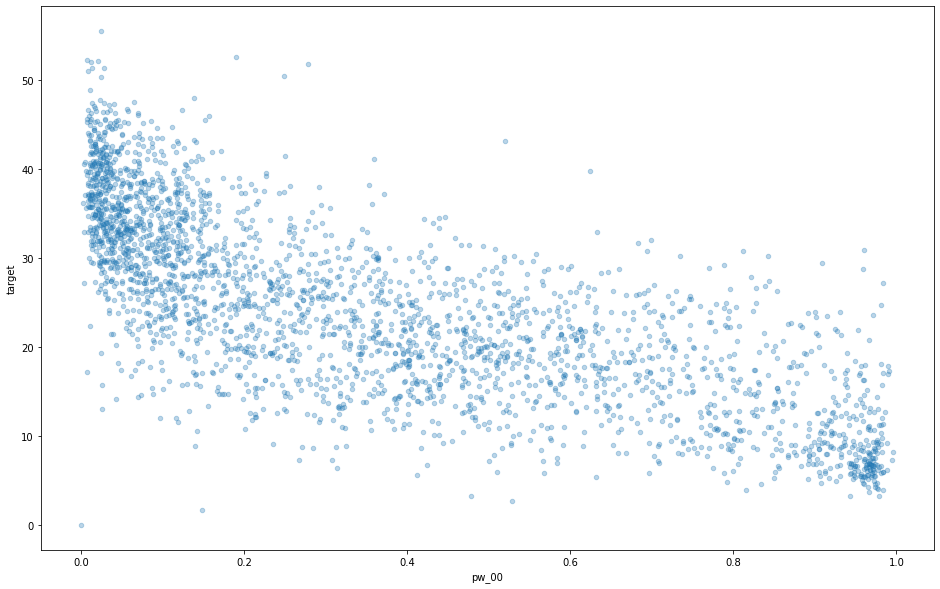

In [6]:
# pw_00: Percentage with piped water access: Piped (tap) water inside dwelling/institution.
df.plot(x='pw_00', y='target', kind='scatter', alpha=0.3)

# Feature Engineering and Model Tuning



In [7]:
# Installing catboost
!pip install catboost
from catboost import CatBoostRegressor

     |████████████████████████████████| 64.4MB 55kB/s 


In [0]:
X = df[in_cols].copy()

# select the most important features .. they can be found by the .feature_importance function of catboost model and/or by looking to 
# the correlations presented in the last section LAB 
X = X[['psa_00','pw_00', 'car_01', 'car_00', 'lan_10', 'lon', 'lan_11', 'pg_00', 'psa_01', 'lln_00', 'lan_00']]

y = df[ycol].copy()

In [0]:
# Load the test data
test = pd.read_csv('gdrive/My Drive/Colab Notebooks/women_sa/Test.csv')

# select the same features for test data
sub = test[['ward', 'psa_00', 'pw_00', 'car_01', 'car_00', 'lan_10', 'lon', 'lan_11', 'pg_00', 'psa_01', 'lln_00', 'lan_00']]
test = test[['psa_00', 'pw_00', 'car_01', 'car_00', 'lan_10', 'lon', 'lan_11', 'pg_00', 'psa_01', 'lln_00', 'lan_00']]

In [0]:
# with these parameters the model is ranked 31 out of 201 : TOP 15% in the competition
catreg = CatBoostRegressor(depth= 8,
                           iterations= 90,
                           l2_leaf_reg= 2,
                           learning_rate= 0.06,
                           per_float_feature_quantization='0:border_count=1039'
                           )

In [11]:
# training
catreg.fit(X, y)

0:	learn: 9.8294430	total: 62.9ms	remaining: 5.6s
1:	learn: 9.3944215	total: 76ms	remaining: 3.34s
2:	learn: 8.9833879	total: 89.6ms	remaining: 2.6s
3:	learn: 8.6030136	total: 101ms	remaining: 2.17s
4:	learn: 8.2478308	total: 112ms	remaining: 1.91s
5:	learn: 7.9126574	total: 124ms	remaining: 1.73s
6:	learn: 7.5980410	total: 135ms	remaining: 1.6s
7:	learn: 7.3017811	total: 146ms	remaining: 1.5s
8:	learn: 7.0389105	total: 158ms	remaining: 1.42s
9:	learn: 6.7921411	total: 170ms	remaining: 1.36s
10:	learn: 6.5481514	total: 182ms	remaining: 1.3s
11:	learn: 6.3265224	total: 193ms	remaining: 1.26s
12:	learn: 6.1237604	total: 205ms	remaining: 1.22s
13:	learn: 5.9294940	total: 218ms	remaining: 1.18s
14:	learn: 5.7442509	total: 229ms	remaining: 1.15s
15:	learn: 5.5900523	total: 241ms	remaining: 1.11s
16:	learn: 5.4394967	total: 253ms	remaining: 1.08s
17:	learn: 5.2929707	total: 268ms	remaining: 1.07s
18:	learn: 5.1562817	total: 279ms	remaining: 1.04s
19:	learn: 5.0385413	total: 291ms	remaining: 

In [0]:
# prediction
sub['target'] = catreg.predict(test)
# Save and submit!
sub[['ward', 'target']].to_csv('cat_submission.csv', index=False)
%cp cat_submission.csv gdrive/'My Drive'/'Colab Notebooks'/'women_sa'

# LAB

 #### Here I looked at the correation between each feature and the target in order to get some insights to pick up the best features

In [0]:
tr = X.copy()

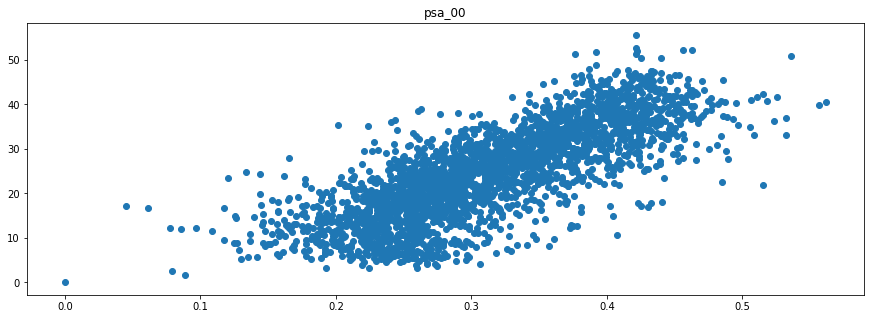

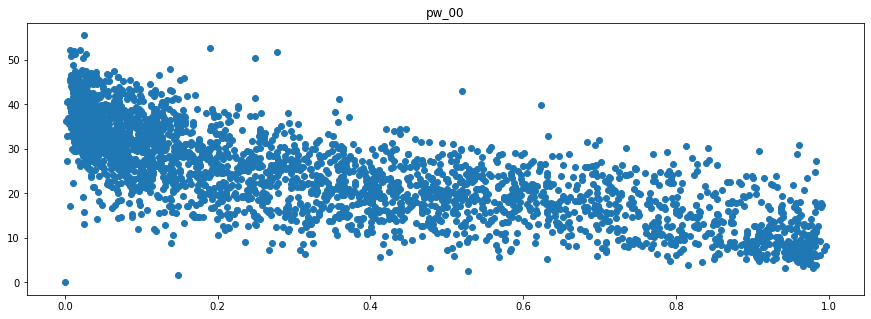

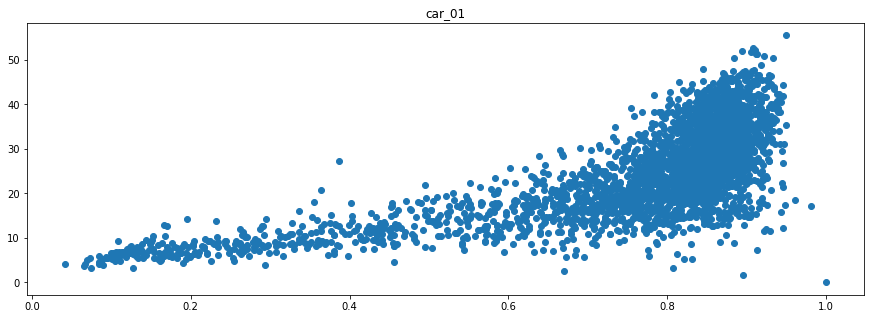

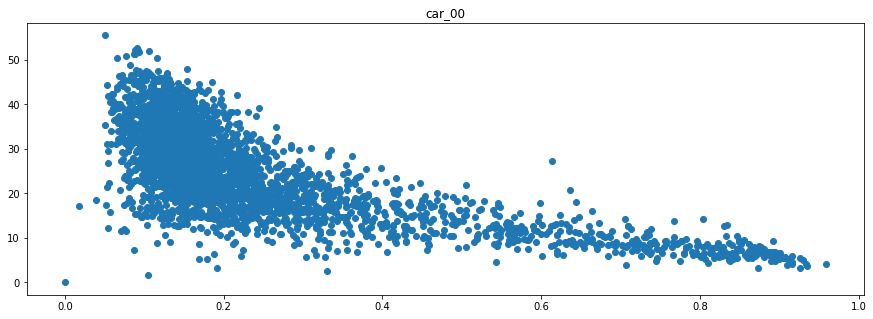

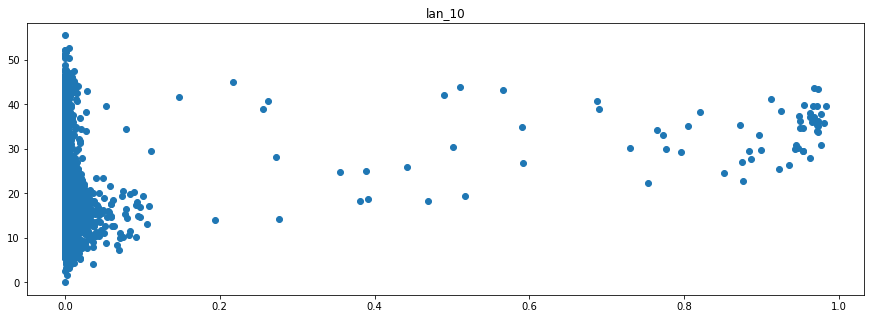

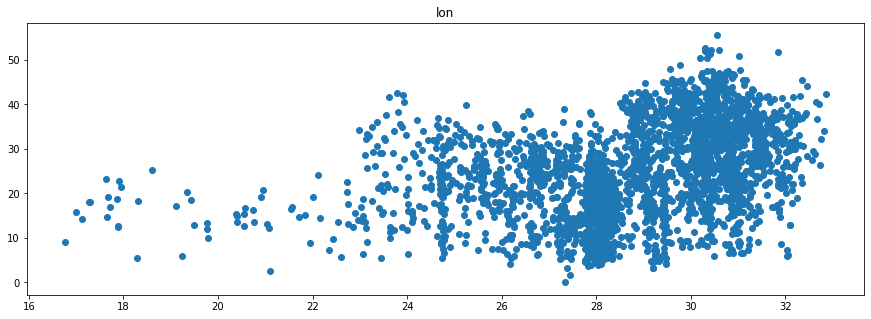

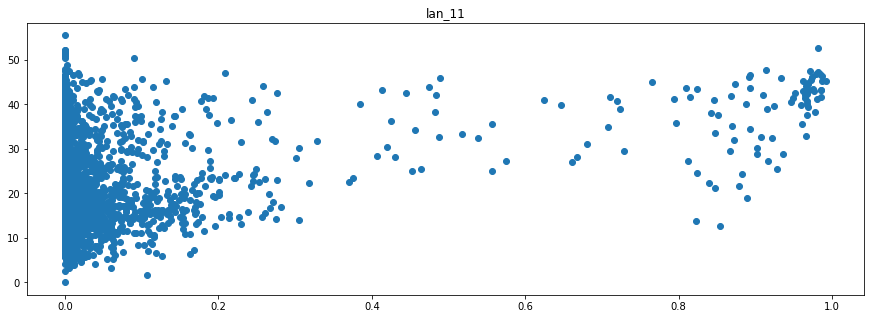

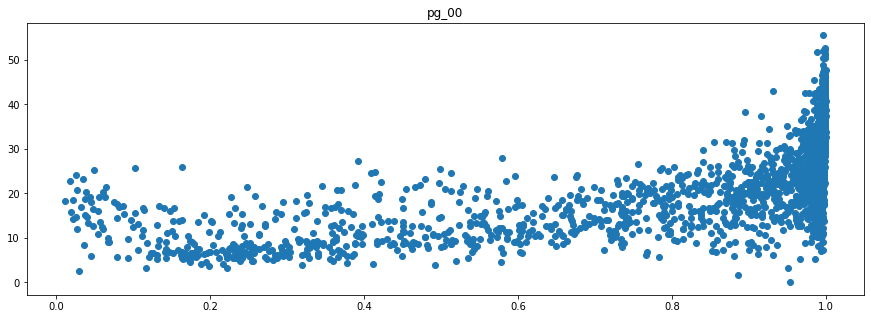

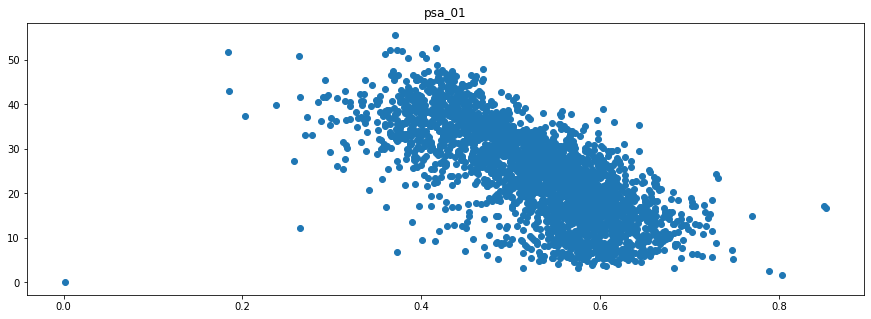

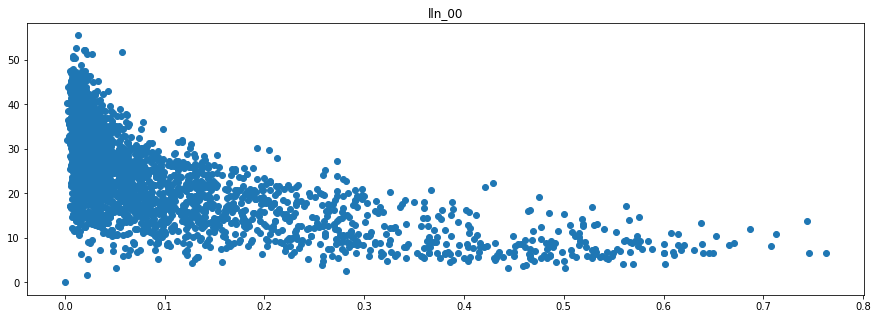

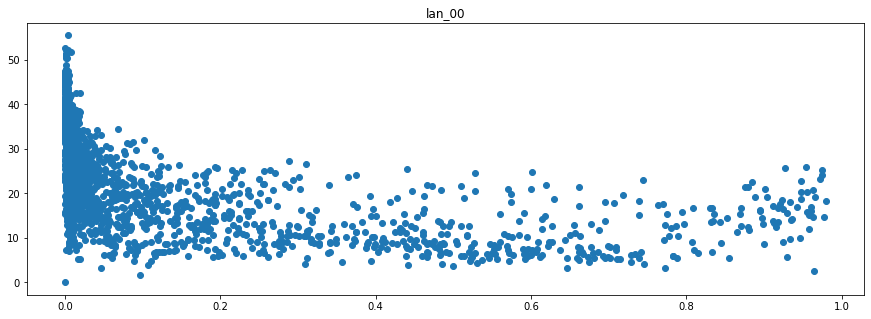

In [15]:
for i in range(11):
  plt.figure(figsize=(15, 5))
  plt.scatter(tr[tr.columns[i]], y)
  plt.title(tr.columns[i])
  plt.show()

In [16]:
# Strong +ve correlations
df.corr()['target'].sort_values(ascending=False).head(10)

target    1.000000
psa_00    0.782472
car_01    0.702831
stv_01    0.664181
lln_01    0.637835
pg_00     0.613346
pw_06     0.470676
dw_01     0.458206
pw_02     0.442441
pw_03     0.440941
Name: target, dtype: float64

In [17]:
# And negative correlations
df.corr()['target'].sort_values().head(10)

pw_00    -0.754536
psa_01   -0.707506
car_00   -0.702831
stv_00   -0.664181
lln_00   -0.637835
pg_03    -0.583908
NL       -0.514398
lan_00   -0.507942
lan_01   -0.438704
dw_04    -0.385533
Name: target, dtype: float64